## DIAMOND PRICE PREDICTION: Linear Regression Example

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [23]:
#!pip install sklearn

In [24]:
df = pd.read_csv('data/diamonds.csv')
df.shape

(53940, 11)

In [25]:
df.describe()

Unnamed: 0         carat         depth         table         price             x             y             z
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722      5.731157      5.734526      3.538734
std    15571.281097      0.474011      1.432621      2.234491   3989.439738      1.121761      1.142135      0.705699
min        1.000000      0.200000     43.000000     43.000000    326.000000      0.000000      0.000000      0.000000
25%    13485.750000      0.400000     61.000000     56.000000    950.000000      4.710000      4.720000      2.910000
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000      5.700000      5.710000      3.530000
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000      6.540000      6.540000      4.040000
max    53940.000000      5.010000     79.000000     95.000000  18823.000000     10.740000     58.900000     31.800000

In [26]:
df = df.drop(["Unnamed: 0"], axis=1)

In [27]:
df.describe()

carat         depth         table         price             x             y             z
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000
mean       0.797940     61.749405     57.457184   3932.799722      5.731157      5.734526      3.538734
std        0.474011      1.432621      2.234491   3989.439738      1.121761      1.142135      0.705699
min        0.200000     43.000000     43.000000    326.000000      0.000000      0.000000      0.000000
25%        0.400000     61.000000     56.000000    950.000000      4.710000      4.720000      2.910000
50%        0.700000     61.800000     57.000000   2401.000000      5.700000      5.710000      3.530000
75%        1.040000     62.500000     59.000000   5324.250000      6.540000      6.540000      4.040000
max        5.010000     79.000000     95.000000  18823.000000     10.740000     58.900000     31.800000

In [28]:
df.describe().transpose() 

count         mean          std    min     25%      50%      75%       max
carat  53940.0     0.797940     0.474011    0.2    0.40     0.70     1.04      5.01
depth  53940.0    61.749405     1.432621   43.0   61.00    61.80    62.50     79.00
table  53940.0    57.457184     2.234491   43.0   56.00    57.00    59.00     95.00
price  53940.0  3932.799722  3989.439738  326.0  950.00  2401.00  5324.25  18823.00
x      53940.0     5.731157     1.121761    0.0    4.71     5.70     6.54     10.74
y      53940.0     5.734526     1.142135    0.0    4.72     5.71     6.54     58.90
z      53940.0     3.538734     0.705699    0.0    2.91     3.53     4.04     31.80

In [29]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [18]:
# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

carat     depth     table     price         x         y         z
carat  1.000000  0.028259  0.181646  0.921592  0.977779  0.953991  0.961048
depth  0.028259  1.000000  0.295733  0.010729  0.025017  0.029069  0.095023
table  0.181646  0.295733  1.000000  0.127245  0.196097  0.184493  0.152483
price  0.921592  0.010729  0.127245  1.000000  0.887231  0.867864  0.868206
x      0.977779  0.025017  0.196097  0.887231  1.000000  0.974918  0.975435
y      0.953991  0.029069  0.184493  0.867864  0.974918  1.000000  0.956744
z      0.961048  0.095023  0.152483  0.868206  0.975435  0.956744  1.000000

In [18]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

/tmp/ipykernel_421/2797590206.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


carat     depth     table     price         x         y         z
carat    NaN  0.028259  0.181646  0.921592  0.977779  0.953991  0.961048
depth    NaN       NaN  0.295733  0.010729  0.025017  0.029069  0.095023
table    NaN       NaN       NaN  0.127245  0.196097  0.184493  0.152483
price    NaN       NaN       NaN       NaN  0.887231  0.867864  0.868206
x        NaN       NaN       NaN       NaN       NaN  0.974918  0.975435
y        NaN       NaN       NaN       NaN       NaN       NaN  0.956744
z        NaN       NaN       NaN       NaN       NaN       NaN       NaN

In [19]:
# Find index of feature columns with correlation greater than 0.50
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]
to_drop

['price', 'x', 'y', 'z']

<AxesSubplot:>

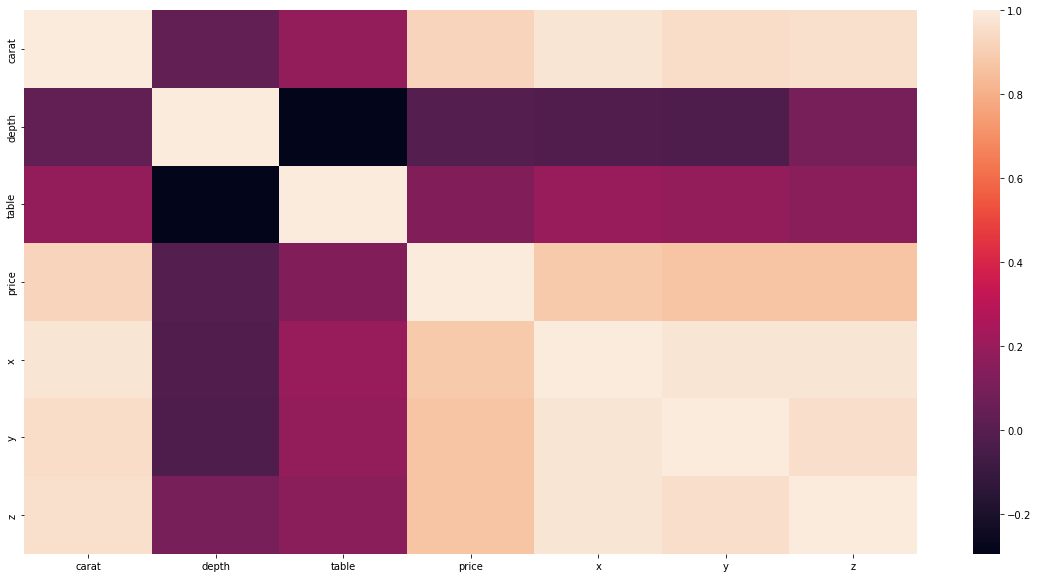

In [20]:
#### 4.2 Correlation heatmap of the numberic variables
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(df.corr())

/tmp/ipykernel_421/3615738660.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)  # make mask


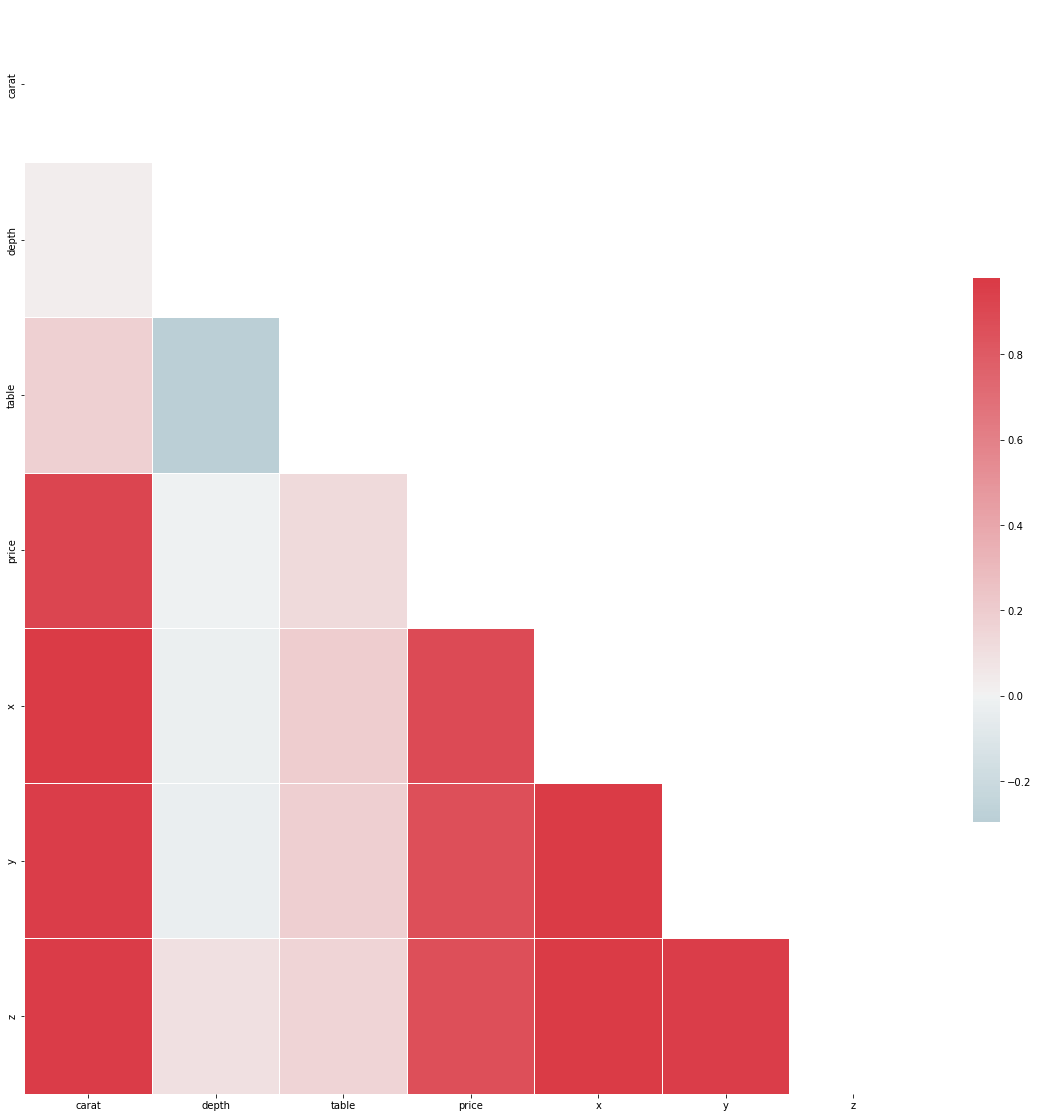

In [21]:
# seaborn
## first_twenty = har_train.iloc[:, :20] # pull out first 20 feats
corr = df.corr()  # compute correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)  # make mask
mask[np.triu_indices_from(mask)] = True  # mask the upper triangle

fig, ax = plt.subplots(figsize=(20, 20))  # create a figure and a subplot
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    linewidth=0.5,
    cbar_kws={'shrink': 0.5}
);

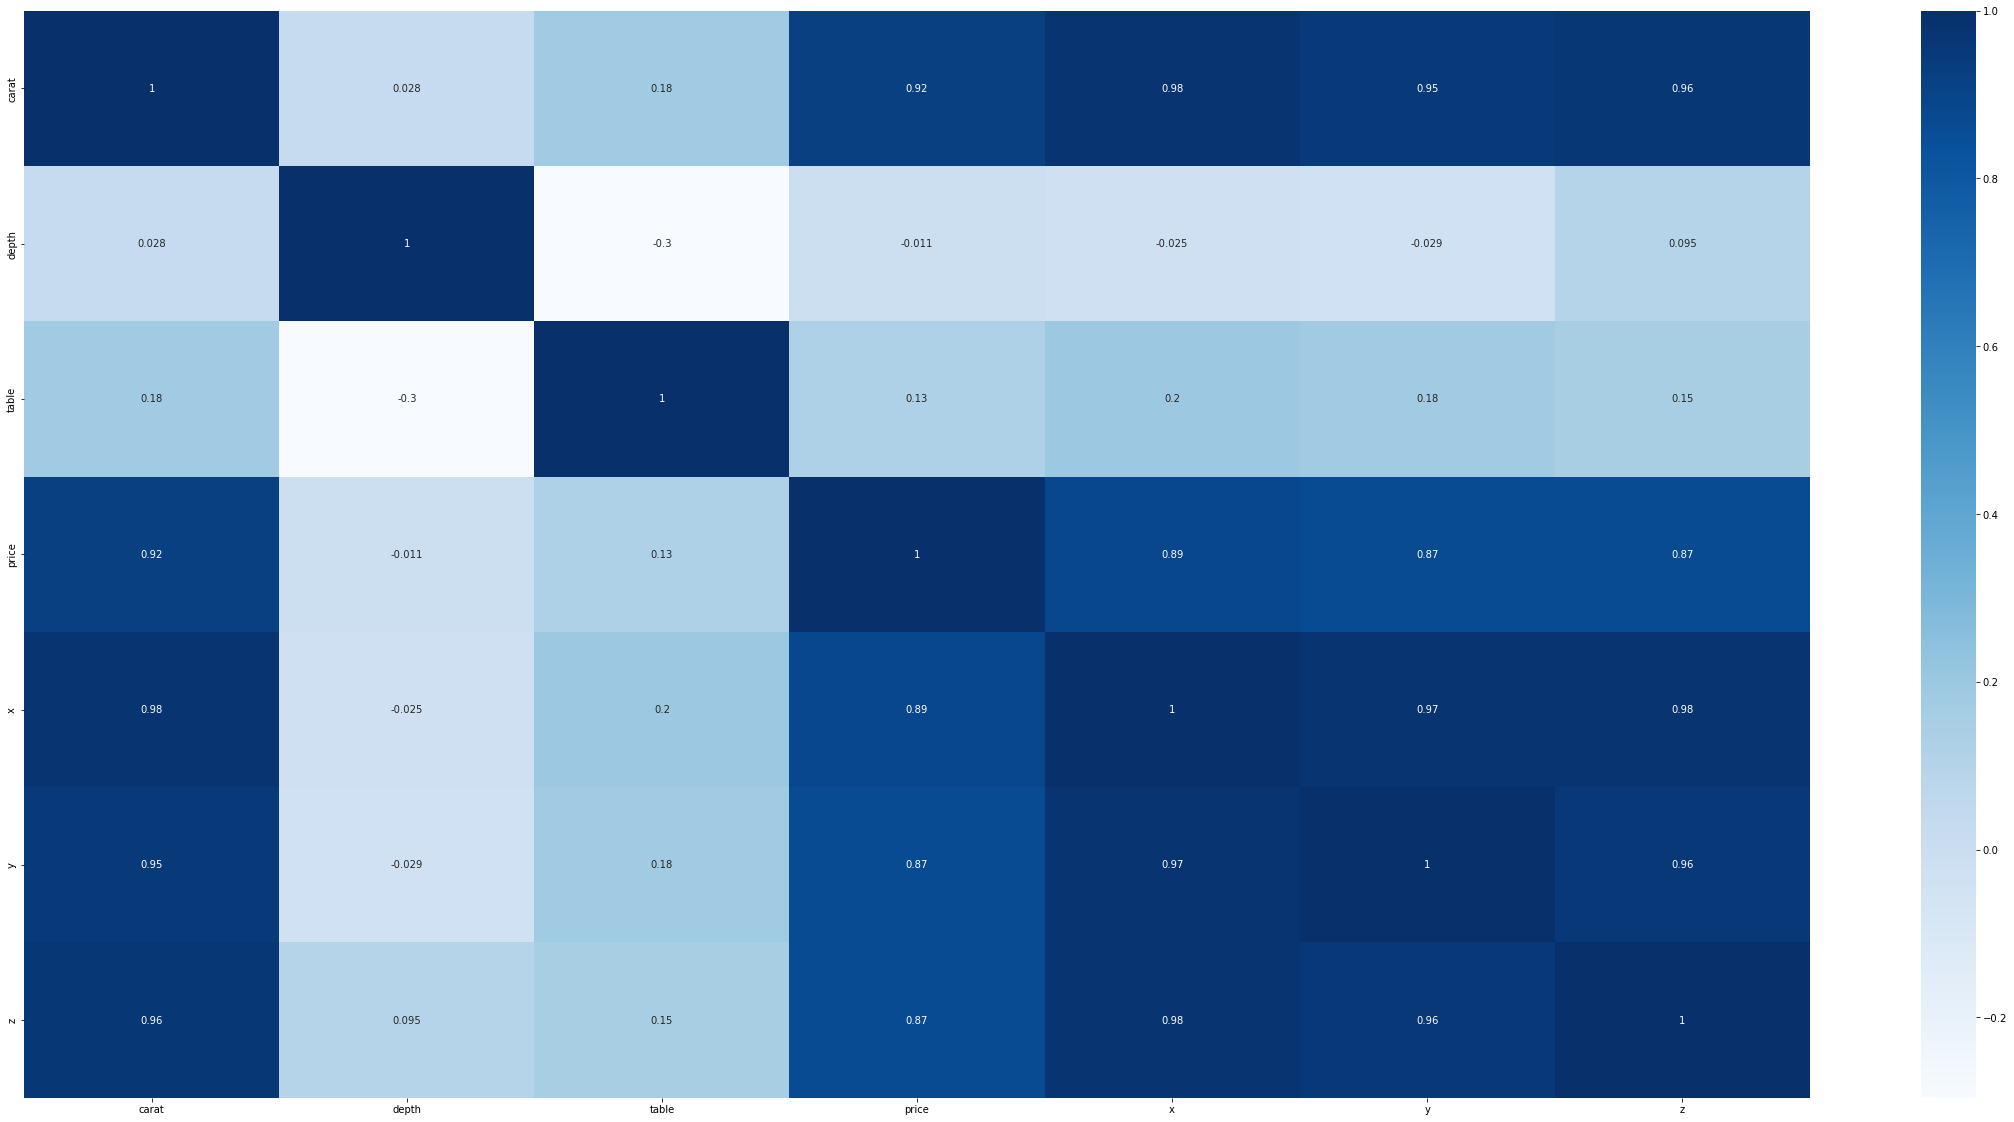

In [22]:
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, ax=ax);

## Exploratory data analysis

In [23]:
# target
print(df['price'].describe())

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
max      18823.000000
Name: price, dtype: float64


<AxesSubplot:>

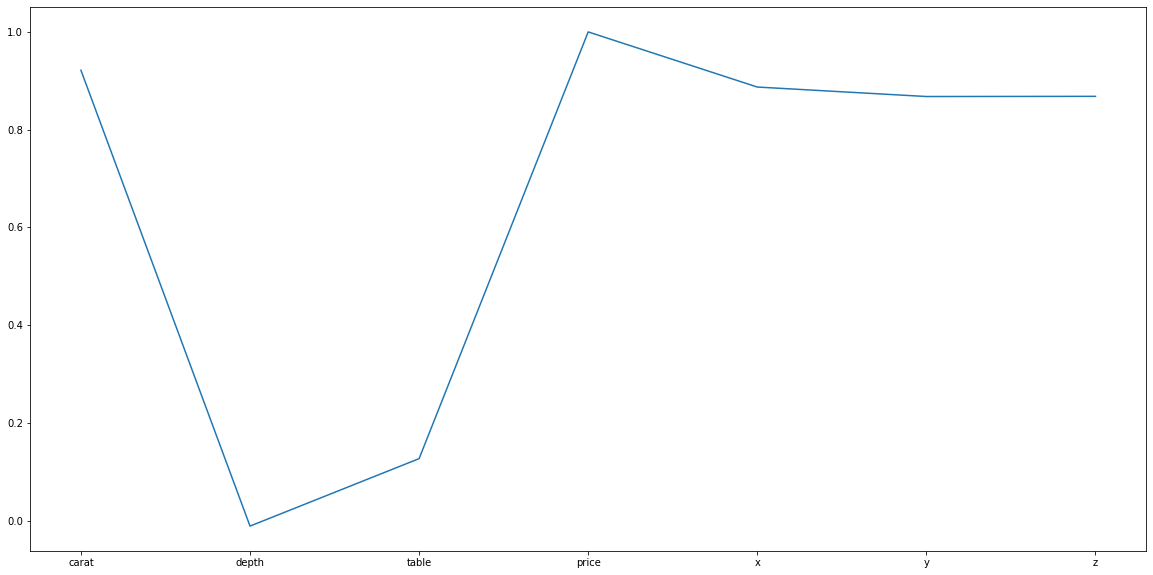

In [24]:
# Correlation with Target Variable

df.corr()['price'].plot()
#autinsurance.corr().plot()

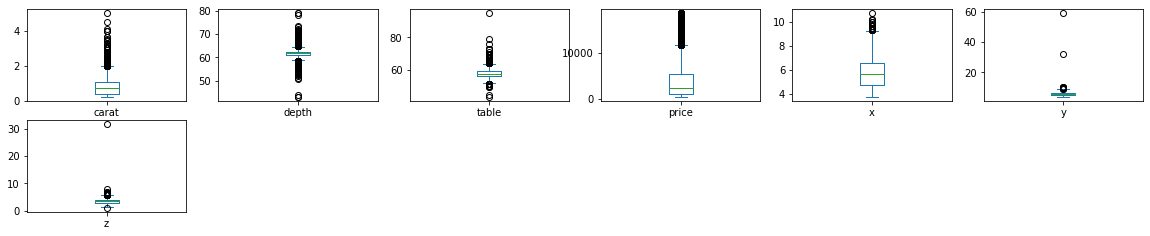

In [25]:
# Box and Whisker Plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,20  # control plot size
df.plot(kind='box', subplots=True, layout=(10,6), sharex=False, sharey=False)
plt.show()


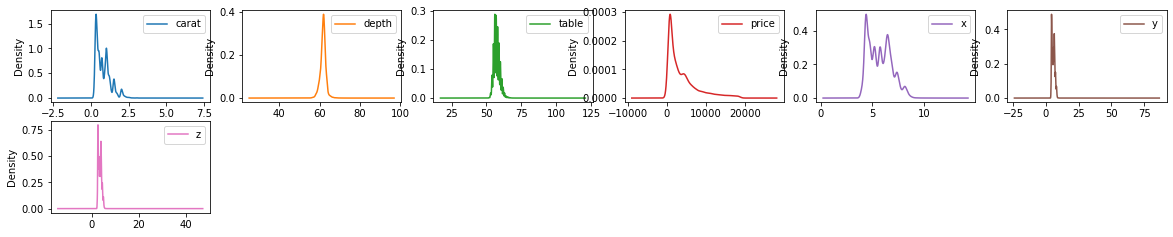

In [26]:
# Univariate Density Plots
plt.rcParams['figure.figsize'] = 20,20  # control plot size

df.plot(kind='density', subplots=True, layout=(10,6), sharex=False)
plt.show()


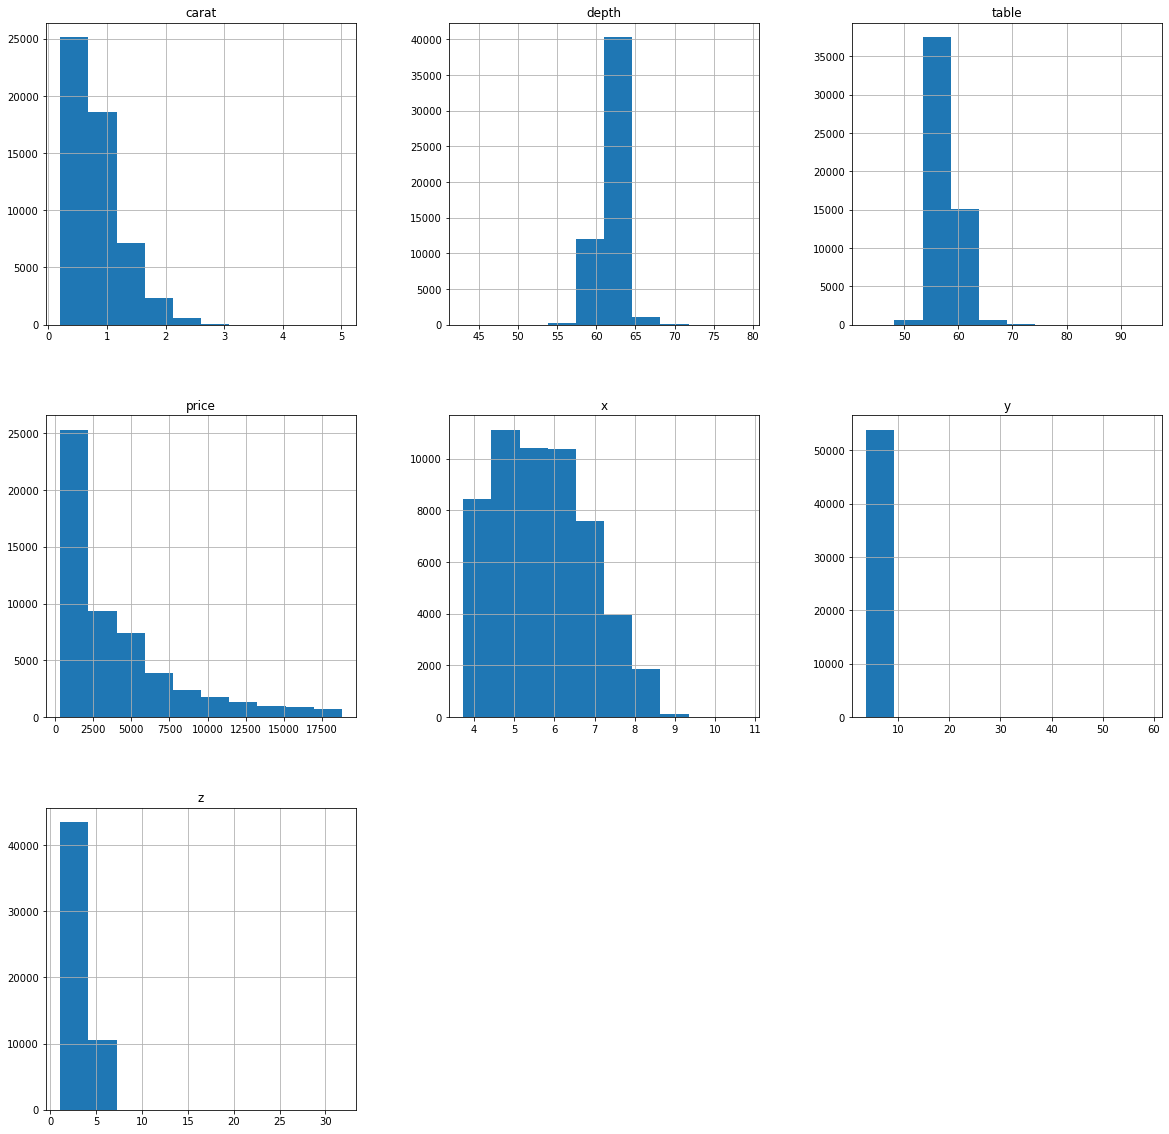

In [27]:
# Univariate Histograms
plt.rcParams['figure.figsize'] = 20,20  # control plot size

df.hist()
plt.show()


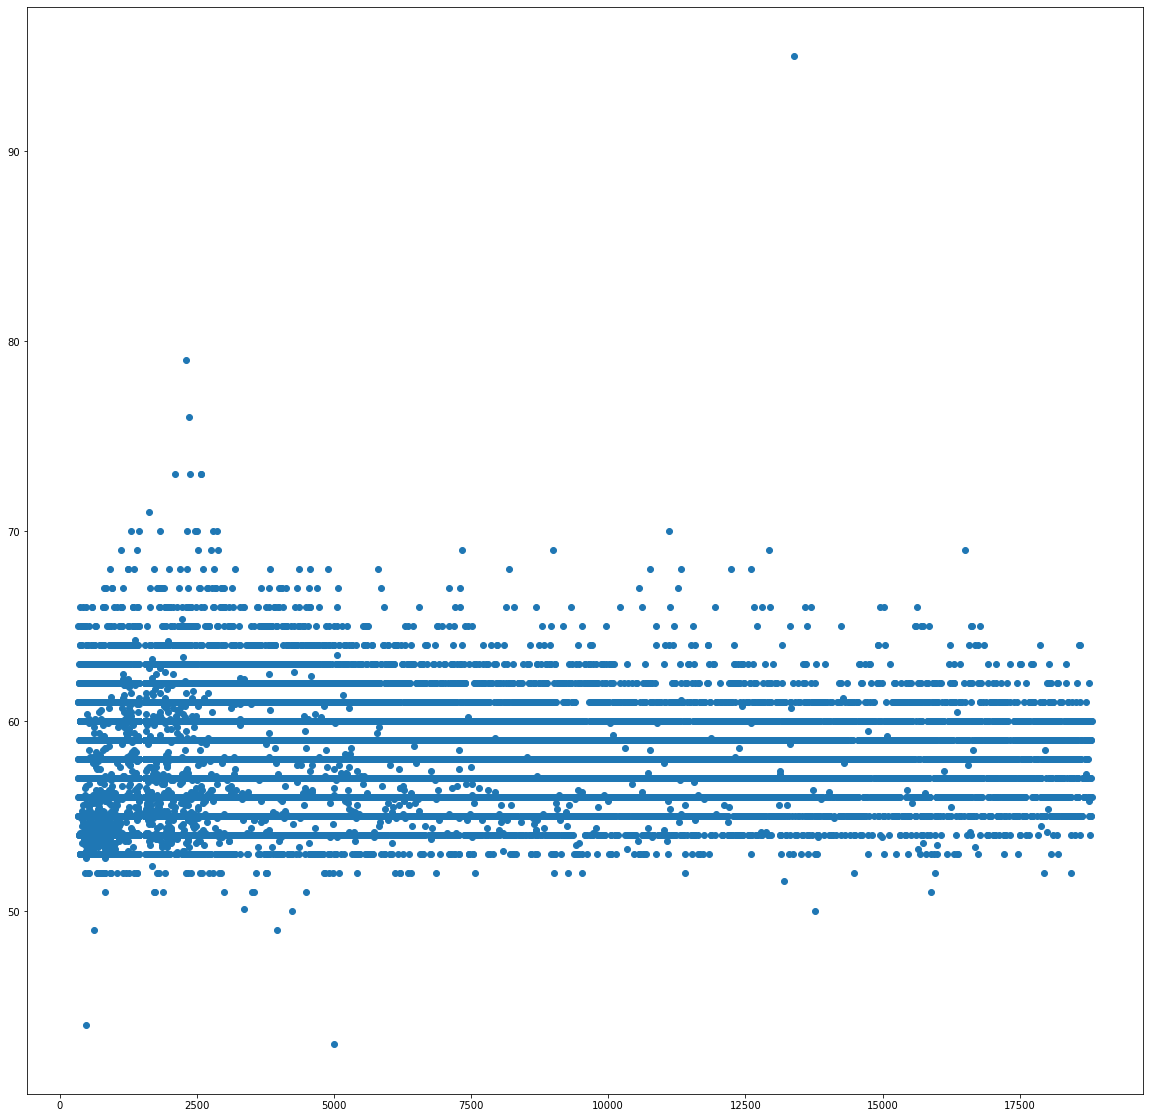

In [34]:
plt.scatter(df['price'], df['table']);

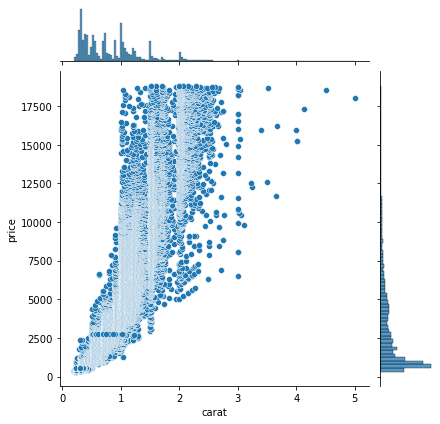

In [30]:
sns.jointplot(x='carat', y='price', 
              data=df, kind='scatter');

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


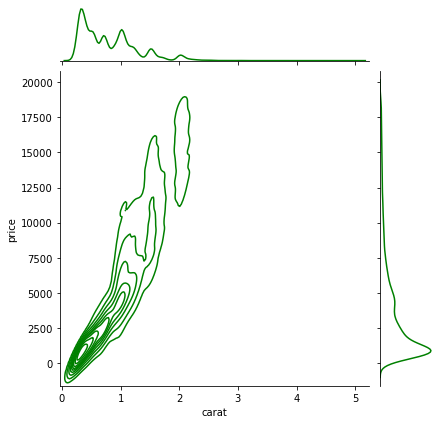

In [31]:
sns.jointplot('carat', 'price', data=df,
              kind="kde", color="g");

In [32]:
corr = df.corr()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.50)]
to_drop

/tmp/ipykernel_421/1200380641.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


['price', 'x', 'y', 'z']

In [33]:
df.describe().transpose() 

count         mean          std     min     25%      50%      75%       max
carat  53920.0     0.797698     0.473795    0.20    0.40     0.70     1.04      5.01
depth  53920.0    61.749514     1.432331   43.00   61.00    61.80    62.50     79.00
table  53920.0    57.456834     2.234064   43.00   56.00    57.00    59.00     95.00
price  53920.0  3930.993231  3987.280446  326.00  949.00  2401.00  5323.25  18823.00
x      53920.0     5.731627     1.119423    3.73    4.71     5.70     6.54     10.74
y      53920.0     5.734887     1.140126    3.68    4.72     5.71     6.54     58.90
z      53920.0     3.540046     0.702530    1.07    2.91     3.53     4.04     31.80

In [36]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

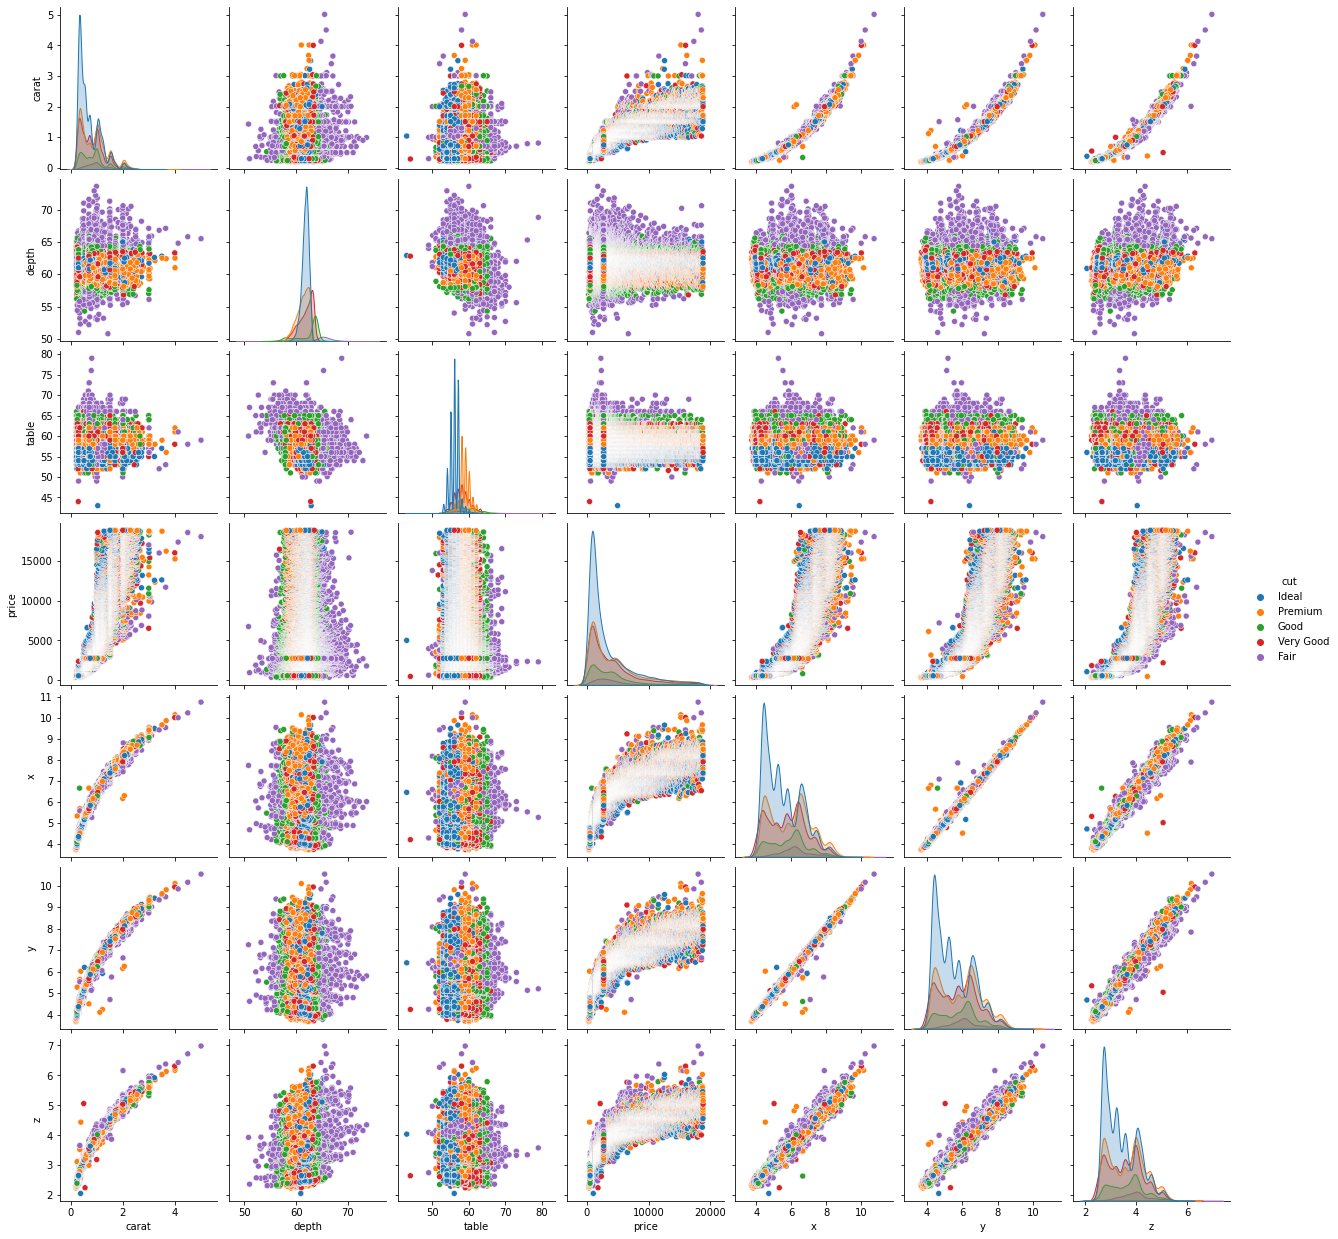

In [38]:
ax=sns.pairplot(df, hue= "cut")

In [19]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [20]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()


carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [31]:
import pandas as pd
data_cut={'cut':['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']}
df_cut=pd.DataFrame(data_cut)
df_cut
cut_rating_dict={'Ideal':5, 'Premium':4, 'Good':3, 'Very Good':2, 'Fair':1}
label_data['cut_o']=df.cut.map(cut_rating_dict)

In [32]:
data_color={'color':['E', 'I', 'J', 'H', 'F', 'G', 'D']}
df_color=pd.DataFrame(data_color)
df_color
color_rating_dict={'D':7, 'E':6, 'F':5, 'G':4, 'H':3,'I':2,'J':1}
label_data['color_o']=df.color.map(color_rating_dict)

In [127]:
label_data.color_o.unique()

array([6, 2, 1, 3, 5, 4, 7])

In [125]:
df_color

color
0     E
1     I
2     J
3     H
4     F
5     G
6     D

In [33]:
data_clarity={'clarity':['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']}
df_clarity=pd.DataFrame(data_color)
df_clarity
clarity_rating_dict={'SI2':2, 'SI1':3, 'VS1':5, 'VS2':4, 'VVS2':6, 'VVS1':7, 'I1':1, 'IF':8}
label_data['clarity_o']=df.clarity.map(clarity_rating_dict)

<AxesSubplot:xlabel='cut', ylabel='price'>

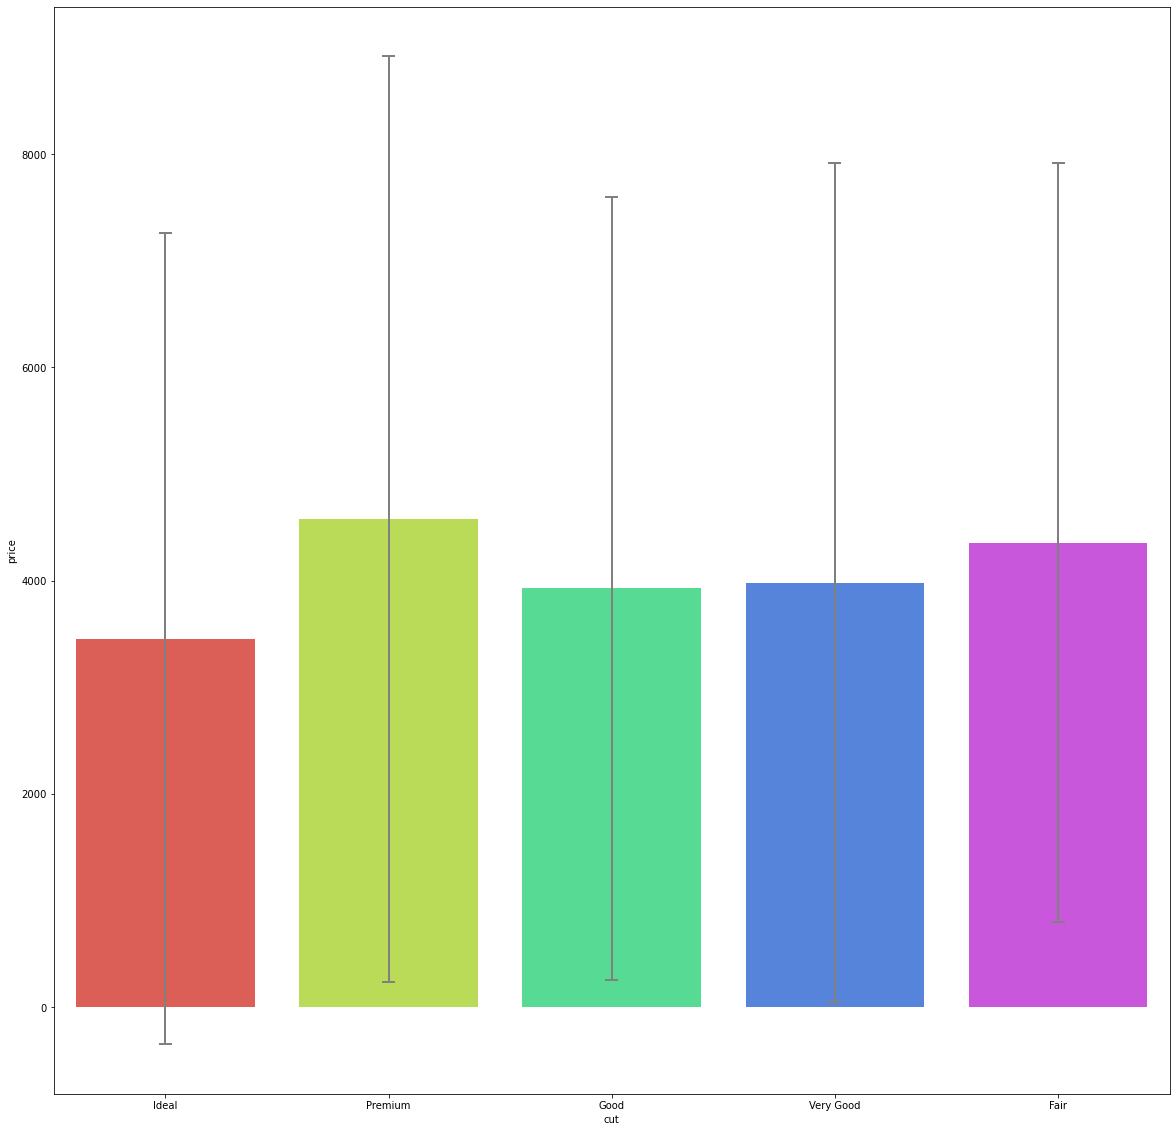

In [113]:
# create plot
sns.barplot(x = 'cut', y = 'price', #hue = 'color',
            data = df,
            palette = 'hls',
            order = ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

<AxesSubplot:xlabel='cut_o', ylabel='price'>

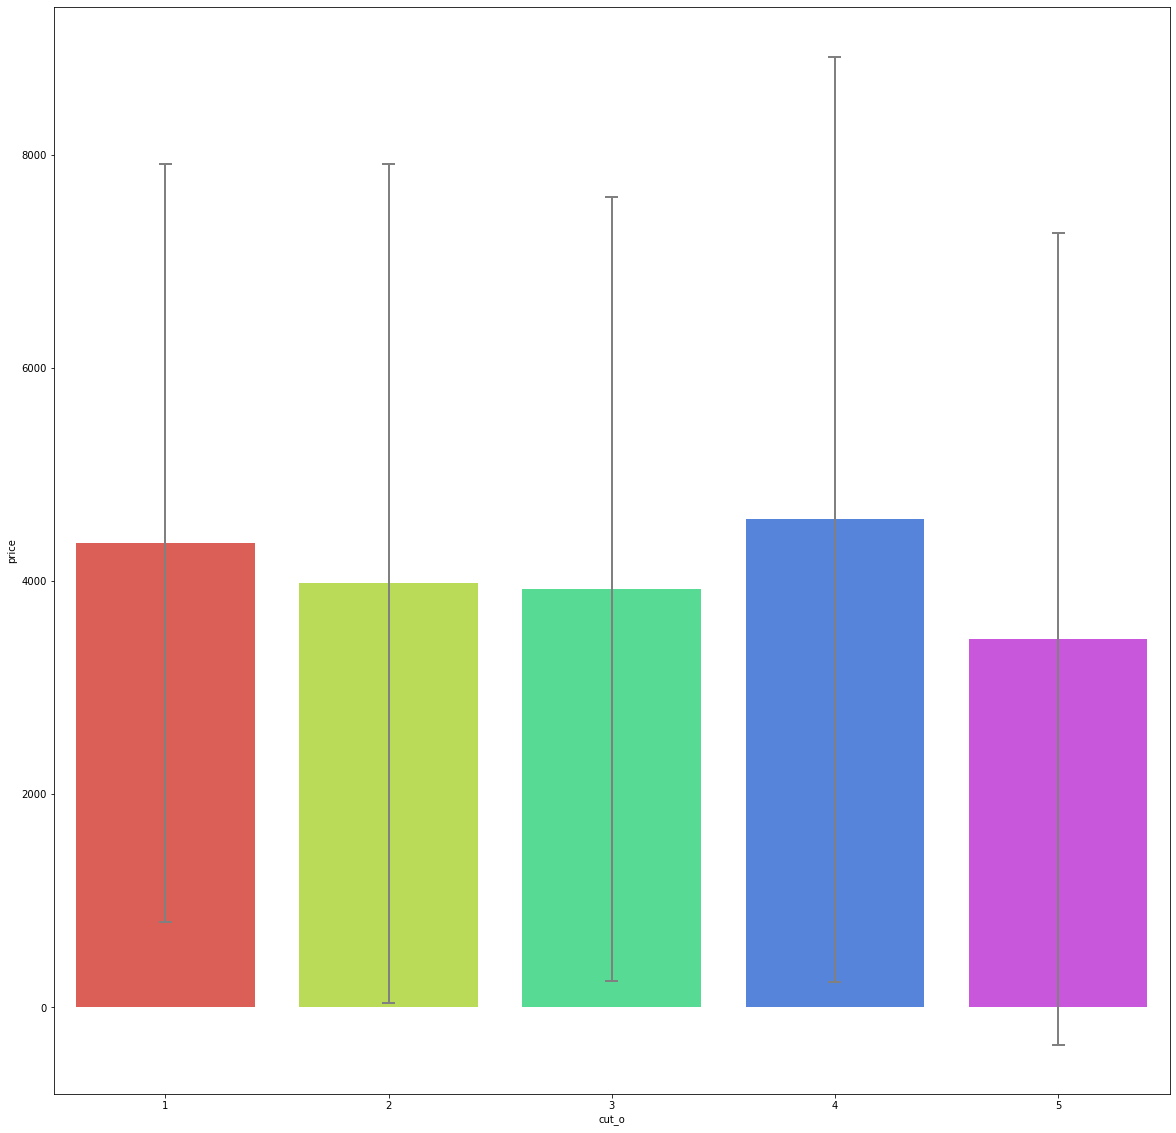

In [115]:
# create plot
sns.barplot(x = 'cut_o', y = 'price', #hue = 'color',
            data = label_data,
            palette = 'hls',
           # order = ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

In [59]:
label_data.cut.unique()

array([2, 3, 1, 4, 0])

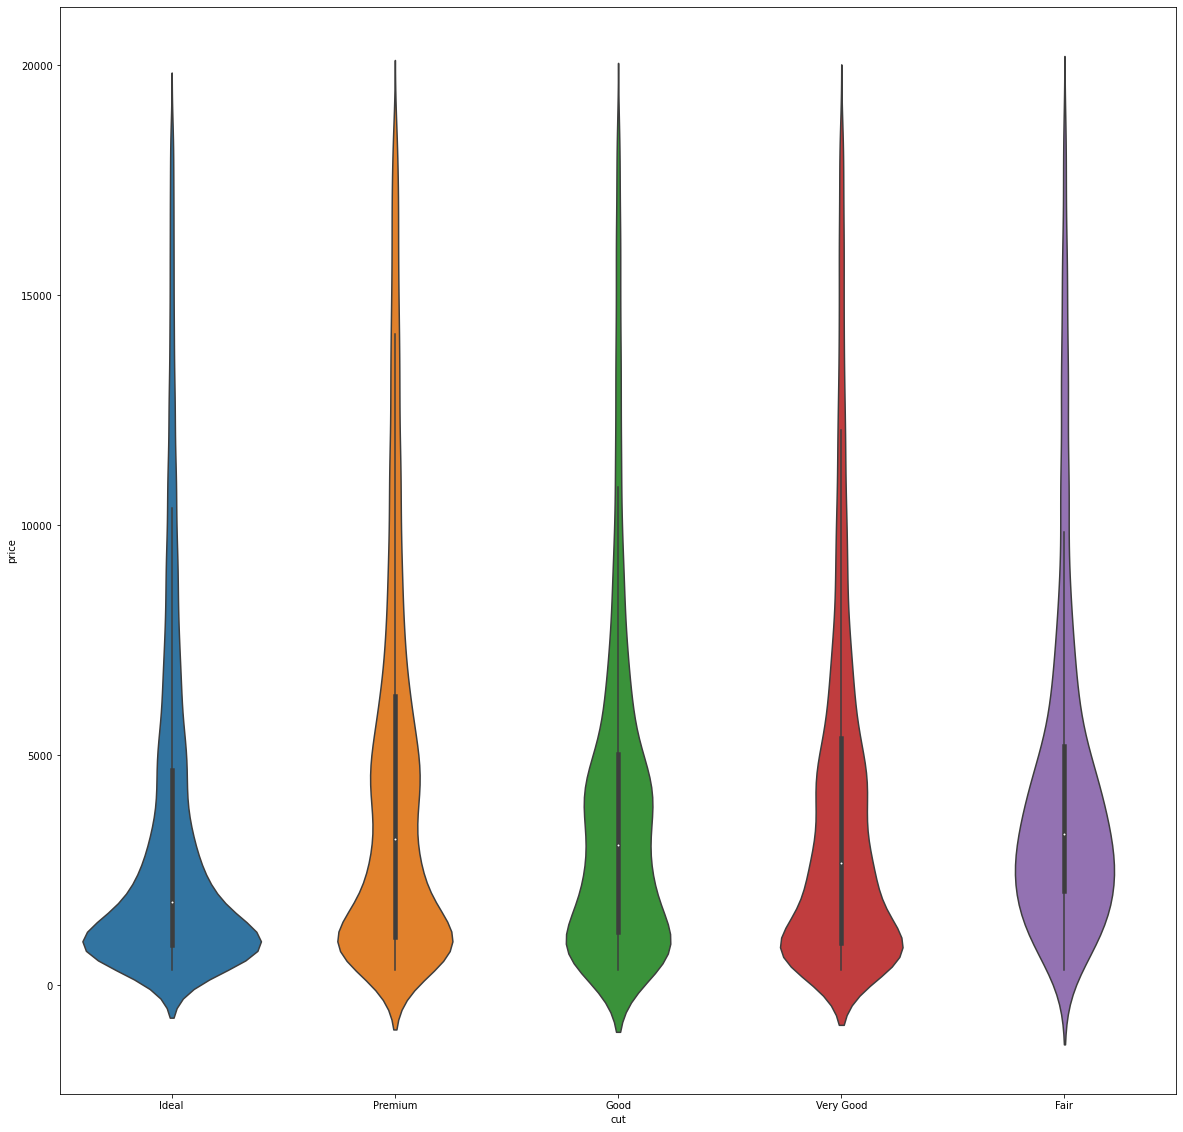

In [41]:
ax = sns.violinplot(x="cut", y="price", data=df)

In [44]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()



carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [122]:
label_data.drop("clarity", axis=1, inplace=True)

<AxesSubplot:>

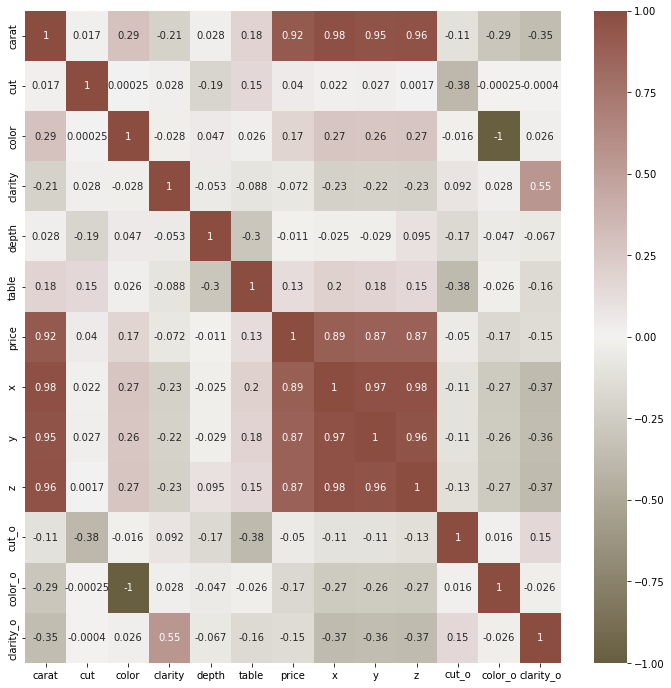

In [34]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [ ]:
label_data.drop("clarity", axis=1, inplace=True)
label_data.drop("cut", axis=1, inplace=True)
label_data.drop("color", axis=1, inplace=True)

In [ ]:
label_data.drop("depth", axis=1, inplace=True)
label_data.drop("table", axis=1, inplace=True)
label_data.drop("y", axis=1, inplace=True)
label_data.drop("z", axis=1, inplace=True)

In [105]:
X_train.head()

carat  depth  table     x     y     z  cut_o  color_o  clarity_o
19372   0.27   62.3   56.0  4.15  4.17  2.59      5        6          7
53321   0.71   63.2   56.0  5.69  5.73  3.61      2        7          3
47554   0.53   61.8   60.0  5.13  5.22  3.20      2        6          5
52695   0.70   61.9   57.0  5.69  5.74  3.54      5        6          4
9843    1.05   60.9   56.0  6.64  6.56  4.02      5        5          2

In [106]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [107]:
df.describe().transpose()

count         mean          std     min     25%      50%      75%       max
carat  53920.0     0.797698     0.473795    0.20    0.40     0.70     1.04      5.01
depth  53920.0    61.749514     1.432331   43.00   61.00    61.80    62.50     79.00
table  53920.0    57.456834     2.234064   43.00   56.00    57.00    59.00     95.00
price  53920.0  3930.993231  3987.280446  326.00  949.00  2401.00  5323.25  18823.00
x      53920.0     5.731627     1.119423    3.73    4.71     5.70     6.54     10.74
y      53920.0     5.734887     1.140126    3.68    4.72     5.71     6.54     58.90
z      53920.0     3.540046     0.702530    1.07    2.91     3.53     4.04     31.80

In [108]:
label_data.describe().transpose()

count         mean          std     min     25%     50%      75%       max
carat      53920.0     0.797698     0.473795    0.20    0.40     0.7     1.04      5.01
price      53920.0  3930.993231  3987.280446  326.00  949.00  2401.0  5323.25  18823.00
x          53920.0     5.731627     1.119423    3.73    4.71     5.7     6.54     10.74
cut_o      53920.0     3.771087     1.266077    1.00    2.00     4.0     5.00      5.00
color_o    53920.0     4.405972     1.701272    1.00    3.00     4.0     6.00      7.00
clarity_o  53920.0     4.051502     1.647005    1.00    3.00     4.0     5.00      8.00

In [112]:
# confirm no missing data
#label_data[['carat','cut_o','color_o','clarity_o','depth','table','price','x','y','z']].isnull().sum()

In [111]:
# confirm all numerical
#label_data[['carat','cut_o','color_o','clarity_o','depth','table','price','x','y','z']].dtypes

## Model Building

In [113]:
# "Instantiate" the scaler (create an instance of the sklearn class)
import sklearn
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()


In [114]:
# 'Fit' the scaler to our X_train data
std_scaler = std_scaler.fit(X_train.values)
std_scaler

StandardScaler()

In [115]:
# Use the scaler to transform the dataset
X_train_scaled = std_scaler.transform(X_train.values)
X_train_scaled[0]

array([-1.11550691, -1.41660567,  0.97005748,  0.93574097,  1.79022231])

In [116]:
# Use the scaler to transform the dataset
X_test_scaled = std_scaler.transform(X_test.values)
X_test_scaled[0]

array([-0.02019489,  0.22653259,  0.97005748, -0.23679845, -1.24484146])

In [117]:
# Create a local instance of the sklearn class
lin_reg = LinearRegression(fit_intercept=True)
lin_reg

LinearRegression()

In [118]:
# Fit your instance to the training dataset
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [119]:
#Examine the feature importances

In [120]:
# 'Attributes' is another name for our list of features (aka predictors, independent variables)
attributes=X_test.columns
print(attributes)
# 'Feature importances' is another name for our coefficients (ie., the impace of each feature on the outcome or DV)
feature_importances=lin_reg.coef_
print(feature_importances)

Index(['carat', 'x', 'cut_o', 'color_o', 'clarity_o'], dtype='object')
[4981.45984747 -848.96648369  143.68605365  553.12726307  847.85989557]


In [121]:
# Check the intercept and coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_)

3939.999085064291
[4981.45984747 -848.96648369  143.68605365  553.12726307  847.85989557]


In [122]:
# 'Attributes' is another name for our list of features (aka predictors, independent variables)
attributes=X_test.columns
print(attributes)
# 'Feature importances' is another name for our coefficients (ie., the impace of each feature on the outcome or DV)
feature_importances=lin_reg.coef_
print(feature_importances)

Index(['carat', 'x', 'cut_o', 'color_o', 'clarity_o'], dtype='object')
[4981.45984747 -848.96648369  143.68605365  553.12726307  847.85989557]


In [123]:
# obviously, these 2 things will have the same length
print(len(feature_importances))
print(len(attributes))

5
5


In [124]:
[int(x) for x in list(feature_importances)]

[4981, -848, 143, 553, 847]

In [125]:
# let's take a look at the results
feature_imp = pd.DataFrame(list(zip(attributes, feature_importances)), columns=['features', 'coeffs'])
feature_imp=feature_imp.set_index('features')
feature_imp=feature_imp.sort_values('coeffs')
feature_imp

coeffs
features              
x          -848.966484
cut_o       143.686054
color_o     553.127263
clarity_o   847.859896
carat      4981.459847

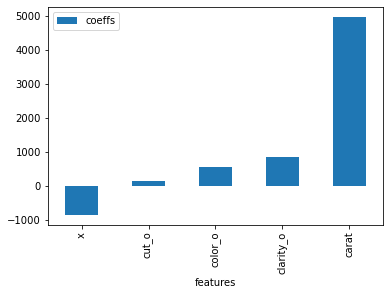

In [126]:
# plot that as a bar chart
feature_imp.plot(kind='bar');

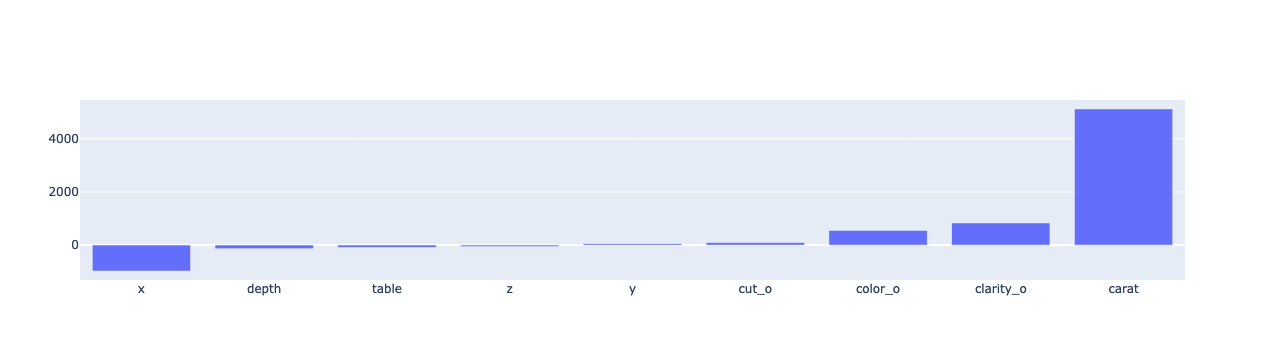

In [75]:
# with plotly
import plotly.graph_objects as go
data = go.Bar(x=list(feature_imp.index), y=feature_imp['coeffs'])
coefs = go.Figure([data])
coefs

In [76]:
#!Prediction

In [127]:
X_train.columns

Index(['carat', 'x', 'cut_o', 'color_o', 'clarity_o'], dtype='object')

In [128]:
# Show variables for a single observation:
print(X_train.iloc[0])

carat        0.27
x            4.15
cut_o        5.00
color_o      6.00
clarity_o    7.00
Name: 19372, dtype: float64


In [129]:
# Show scaled variables for that single observation:
# Remember that we dropped the variable "<1H OCEAN"
print(X_train_scaled[0])

[-1.11550691 -1.41660567  0.97005748  0.93574097  1.79022231]


In [130]:
# Make a prediction on that:
lin_reg.predict([X_train_scaled[0]])

array([1760.62219378])

In [133]:
# Make up some fake data that's similar
fake = np.array([2, 30,5, 6, 7]).reshape(1, -1)
fake

array([[ 2, 30,  5,  6,  7]])

In [134]:
# Standardize using the trained scaler
std_fake = std_scaler.transform(fake)
std_fake

array([[ 2.52851192, 21.66770088,  0.97005748,  0.93574097,  1.79022231]])

In [135]:
# Try a prediction for that observation:
lin_reg.predict(std_fake)

array([315.35314073])

In [165]:
lin_reg

LinearRegression()

In [136]:
# Make predictions on the testing dataset
y_preds = lin_reg.predict(X_test_scaled)

In [137]:
# Examine your predictions
y_preds

array([ 2600.03335381,  6505.56692514,  4878.24360404, ...,
       -1515.37232384, 10419.5958164 ,  1534.52451619])

In [138]:
# root mean squared error represents the average error (in $) of our model
rmse_ols = np.sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse_ols = int(rmse_ols)
rmse_ols 

1207

In [139]:
# how does this compare to a coinflip (i.e., the mean of our training set)?
avg_val = round(y_train.mean(),2)
avg_val

3940.0

In [140]:
# If we used that as our predictor, then the average error (RMSE) of our model would be:
coinflip_preds=np.full((len(y_test), ), avg_val)
rmse_coinflip=np.sqrt(metrics.mean_squared_error(y_test, coinflip_preds))
rmse_coinflip=int(rmse_coinflip)
rmse_coinflip

3988

In [141]:
# R-squared is the proportion of the variance in the DV that's explained by the model
r2_ols=metrics.r2_score(y_test, y_preds)
r2_ols=round(r2_ols, 2)
r2_ols

0.91

In [142]:
# how does this compare to a coinflip (i.e., the mean of our training set)?
r2_coinflip=metrics.r2_score(y_test, coinflip_preds)
r2_coinflip=round(r2_coinflip,2)
r2_coinflip

-0.0

In [143]:
# Compare OLS Linear Regression to the Baseline

evaluation_df = pd.DataFrame([['Baseline',rmse_coinflip, r2_coinflip], 
                              ['OLS Linear Regression', rmse_ols, r2_ols]], 
                             columns=['Model','RMSE','R-squared']
                            )
evaluation_df.set_index('Model', inplace=True)
evaluation_df

RMSE  R-squared
Model                                 
Baseline               3988      -0.00
OLS Linear Regression  1207       0.91

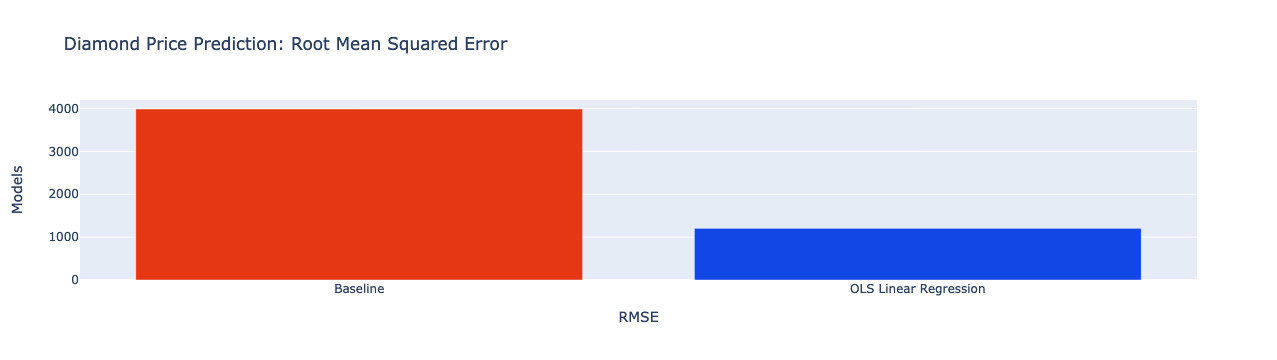

In [144]:
# Bar chart with plotly: RMSE
import plotly.graph_objects as go
trace = go.Bar(x=list(evaluation_df.index), y=evaluation_df['RMSE'], marker=dict(color=['#E53712', '#1247E5']))
layout = go.Layout(title = 'Diamond Price Prediction: Root Mean Squared Error', # Graph title
    yaxis = dict(title = 'Models'), # x-axis label
    xaxis = dict(title = 'RMSE'), # y-axis label  
                  ) 

fig = go.Figure(data = [trace], layout=layout)
fig

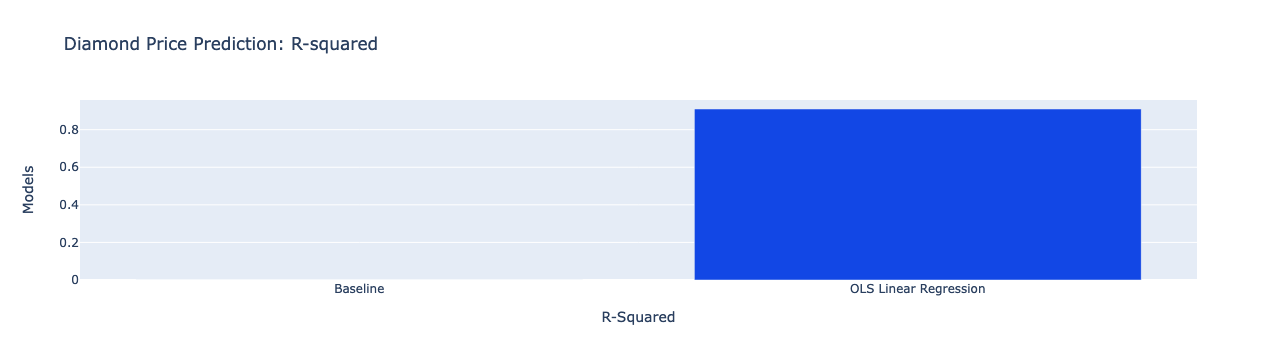

In [145]:
# Bar chart with plotly: RMSE
import plotly.graph_objects as go
trace = go.Bar(x=list(evaluation_df.index), y=evaluation_df['R-squared'], marker=dict(color=['#E53712', '#1247E5']))
layout = go.Layout(title = 'Diamond Price Prediction: R-squared', # Graph title
    yaxis = dict(title = 'Models'), # x-axis label
    xaxis = dict(title = 'R-Squared'), # y-axis label  
                  ) 

fig = go.Figure(data = [trace], layout=layout)
fig

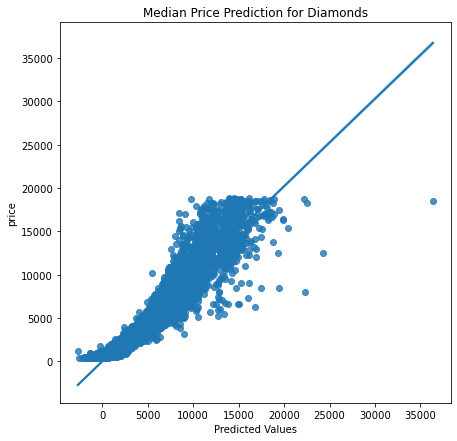

In [146]:
# Visualize our true vs. predicted values
import seaborn as sns
plt.figure(figsize=(7,7))
plt.title('Median Price Prediction for Diamonds')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
fig=sns.regplot(x=y_preds, y=y_test)
plt.show(fig)

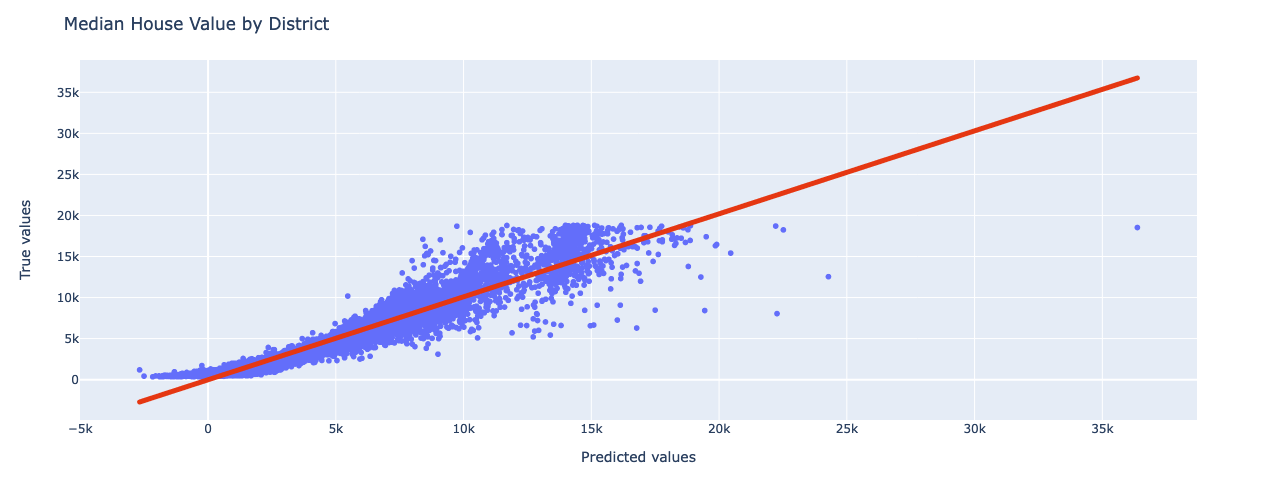

In [147]:
# same thing with plotly
import plotly.express as px
fig = px.scatter(y=y_test, x=y_preds, trendline="ols", width=500, height=500)
fig.update_layout(title = 'Median House Value by District', # Graph title
    yaxis = dict(title = 'True values'), # x-axis label
    xaxis = dict(title = 'Predicted values'), # y-axis label   
)
fig.update_traces(line_color='#E53712', line_width=5)
fig.show()

In [150]:
# Import the model Ridge Regression
from sklearn import linear_model
# Create a local instance of the sklearn class
ridge_model = linear_model.Ridge(alpha=.5)
# Fit your instance to the training dataset
ridge_model.fit(X_train_scaled, y_train)
# Make predictions on the testing dataset
y_preds = ridge_model.predict(X_test_scaled)
# root mean squared error represents the average error (in $) of our model
ridge_rmse = int(np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
# R-squared is the proportion of the variance in the DV that's explained by the model
ridge_r2=round(metrics.r2_score(y_test, y_preds),2)
print(ridge_rmse, ridge_r2)

1207 0.91


In [151]:
# Import the model
from sklearn.neighbors import KNeighborsRegressor
# Create a local instance of the sklearn class
knn_model = KNeighborsRegressor(n_neighbors=8)
# Fit your instance to the training dataset
knn_model.fit(X_train_scaled, y_train)
# Make predictions on the testing dataset
y_preds = knn_model.predict(X_test_scaled)
# root mean squared error represents the average error (in $) of our model
knn_rmse = int(np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
# R-squared is the proportion of the variance in the DV that's explained by the model
knn_r2=round(metrics.r2_score(y_test, y_preds),2)
print(knn_rmse, knn_r2)

620 0.98


In [152]:
# Import the model
from sklearn.tree import DecisionTreeRegressor
# Create a local instance of the sklearn class
tree_model = DecisionTreeRegressor(max_depth=9)
# Fit your instance to the training dataset
tree_model.fit(X_train_scaled, y_train)
# Make predictions on the testing dataset
y_preds = tree_model.predict(X_test_scaled)
# root mean squared error represents the average error (in $) of our model
tree_rmse = int(np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
# R-squared is the proportion of the variance in the DV that's explained by the model
tree_r2=round(metrics.r2_score(y_test, y_preds),2)
print(tree_rmse, tree_r2)

669 0.97


In [153]:
# Import the model
from sklearn.ensemble import RandomForestRegressor
# Create a local instance of the sklearn class
forest_model = RandomForestRegressor(max_depth=10, n_estimators=200)
# Fit your instance to the training dataset
forest_model.fit(X_train_scaled, y_train)
# Make predictions on the testing dataset
y_preds = forest_model.predict(X_test_scaled)
# root mean squared error represents the average error (in $) of our model
forest_rmse = int(np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
# R-squared is the proportion of the variance in the DV that's explained by the model
forest_r2=round(metrics.r2_score(y_test, y_preds),2)
print(forest_rmse, forest_r2)

583 0.98


In [167]:
# Check the intercept and coefficients
print(forest_model)

RandomForestRegressor(max_depth=10, n_estimators=200)


In [154]:
# Compare OLS Linear Regression to the Baseline

evaluation_df2 = pd.DataFrame([['Baseline',rmse_coinflip, r2_coinflip], 
                              ['OLS Linear Regression', rmse_ols, r2_ols],
                              ['Ridge Regession', ridge_rmse, ridge_r2],
                              ['K-Nearest Neighbors Regression', knn_rmse, knn_r2],
                              ['Decision Tree Regression', tree_rmse, tree_r2],
                              ['Random Forest Regression', forest_rmse, forest_r2]], 
                             columns=['Model','RMSE','R-squared']
                            )
evaluation_df2.set_index('Model', inplace=True)
evaluation_df2

RMSE  R-squared
Model                                          
Baseline                        3988      -0.00
OLS Linear Regression           1207       0.91
Ridge Regession                 1207       0.91
K-Nearest Neighbors Regression   620       0.98
Decision Tree Regression         669       0.97
Random Forest Regression         583       0.98

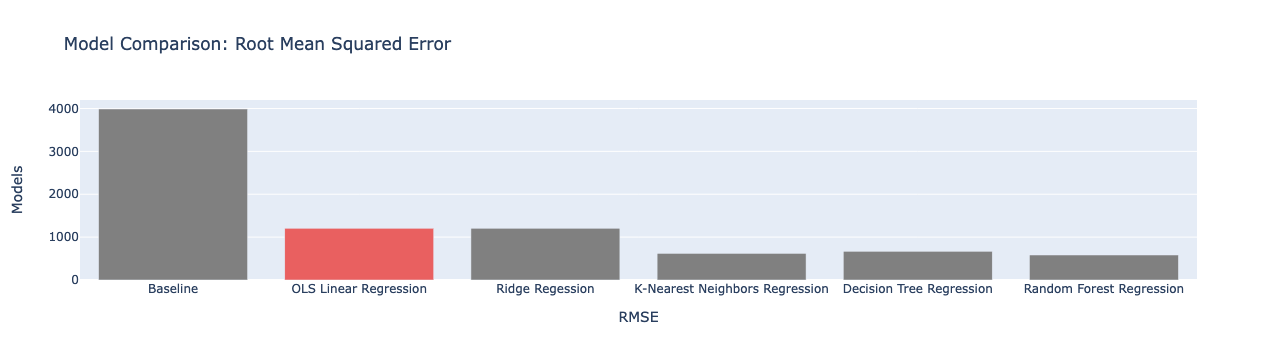

In [155]:
# Bar chart with plotly: RMSE
import plotly.graph_objects as go
trace = go.Bar(x=list(evaluation_df2.index), 
               y=evaluation_df2['RMSE'], 
               marker=dict(color=['gray', '#e96060', 'gray', 'gray', 'gray', 'gray']),
#                marker=dict(color=['#ebc83d','#badf55', '#35b1c9','#b06dad','#e96060', '#1e1d69']),
#               plot_bgcolor='rgb(10,10,10)'
              )
layout = go.Layout(title = 'Model Comparison: Root Mean Squared Error', # Graph title
    yaxis = dict(title = 'Models'), # x-axis label
    xaxis = dict(title = 'RMSE'), # y-axis label  
                  ) 

rmse_fig = go.Figure(data = [trace], layout=layout)
rmse_fig

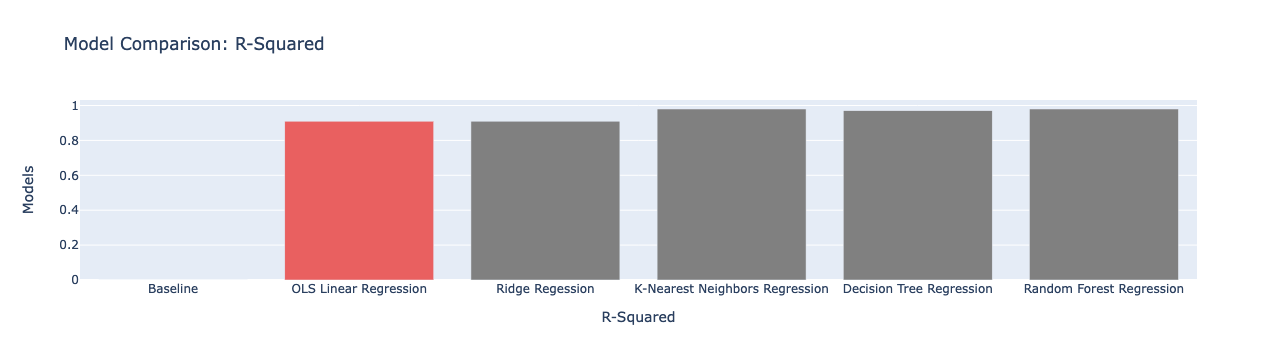

In [156]:
# Bar chart with plotly: R-Squared
import plotly.graph_objects as go
trace = go.Bar(x=list(evaluation_df2.index), 
               y=evaluation_df2['R-squared'], 
               marker=dict(color=['gray', '#e96060', 'gray', 'gray', 'gray', 'gray']),
#                marker=dict(color=['#ebc83d','#badf55', '#35b1c9','#b06dad','#e96060', '#1e1d69']),
#               plot_bgcolor='rgb(10,10,10)'
              )
layout = go.Layout(title = 'Model Comparison: R-Squared', # Graph title
    yaxis = dict(title = 'Models'), # x-axis label
    xaxis = dict(title = 'R-Squared'), # y-axis label  
                  ) 

r2_fig = go.Figure(data = [trace], layout=layout)
r2_fig

In [157]:
import pickle

In [158]:
# Store the figures
with open('model_components/coefs_fig.pkl', 'wb') as handle:
    pickle.dump(coefs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [159]:
# Store the figures
with open('model_components/rmse_fig.pkl', 'wb') as handle:
    pickle.dump(rmse_fig, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [160]:
# Store the figures
with open('model_components/r2_fig.pkl', 'wb') as handle:
    pickle.dump(r2_fig, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [161]:
# Store the standard scaler
with open('model_components/std_scaler.pkl', 'wb') as handle:
    pickle.dump(std_scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [162]:
# Store regression model 
import pickle
with open('model_components/lin_reg.pkl', 'wb') as handle:
    pickle.dump(lin_reg, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [168]:
# Store regression model 
import pickle
with open('model_components/forest_model.pkl', 'wb') as handle:
    pickle.dump(forest_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [163]:
with open('model_components/rmse_fig.pkl', 'rb') as f:
    reopen_fig1=pickle.load(f)

In [169]:
with open('model_components/r2_fig.pkl', 'rb') as f:
    reopen_fig2=pickle.load(f)

In [171]:
# Store the figures
with open('model_components/coefs_fig.pkl', 'wb') as handle:
    pickle.dump(coefs, handle, protocol=pickle.HIGHEST_PROTOCOL)

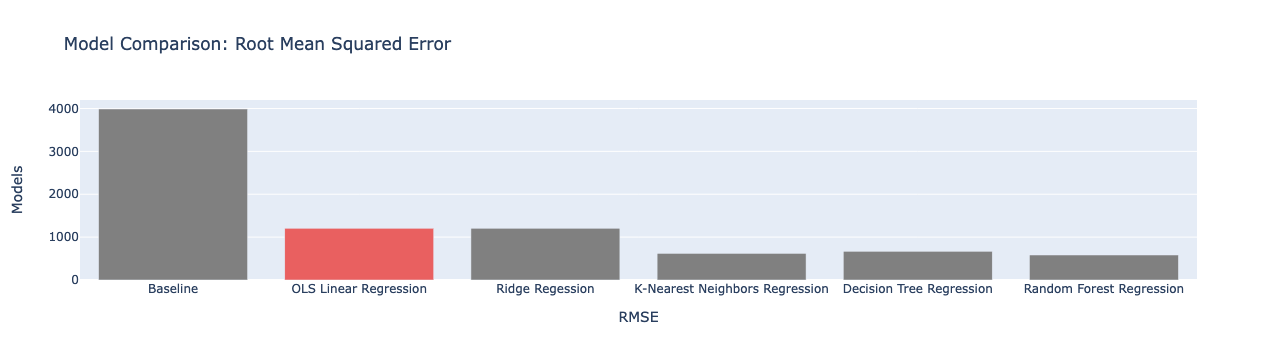

In [164]:
reopen_fig1

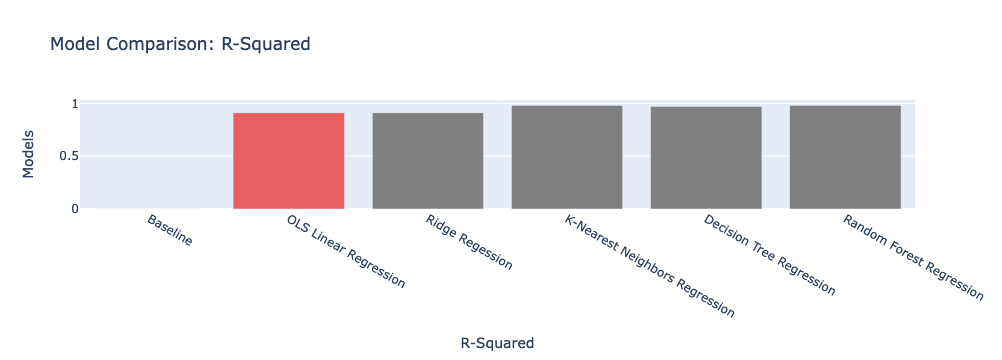

In [170]:
reopen_fig2

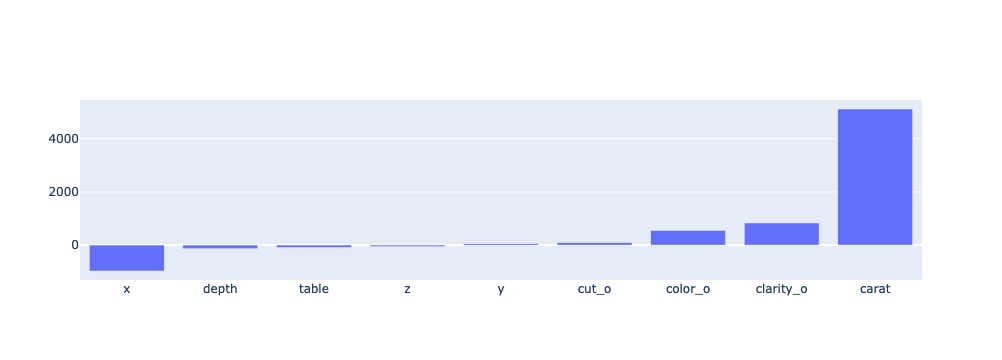

In [172]:
coefs

In [148]:
#My own exploration

In [149]:
# declare features and target
features = ['carat','cut_o','color_o','clarity_o','depth','table','x','y','z']
y = label_data['price']
X = label_data[features]
print(y.shape, X.shape)

KeyError: "['depth', 'table', 'y', 'z'] not in index"

In [132]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [238]:
# Fit the model to the training dataset
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [240]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

array([10923.64837402,    88.89633052,   324.10361701,   499.6267493 ,
         248.02276742,   -29.88355139,  -717.0751204 ,  3311.53248179,
       -5703.46619611])

In [135]:
# what is the equation for this model?
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} '
print("Regression Equation: ", equation)  

Regression Equation:  y = -16859.9616 + 10923.6484*carat + 88.8963*cut_o + 324.1036*color_o + 499.6267*clarity_o+ 248.0228*depth+ -29.8836*table 


In [136]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [int(x) for x in mymodel.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

[3167, 666, 9482, 891, 738]
[3281, -461, 12699, 1854, 1292]


In [173]:
carat=2
cut=2
color=3
clarity=7
x=30

In [174]:
inputs=np.array([carat, cut, color, clarity,x]).reshape(1, -1)

        # standardization
std_inputs = std_scaler.transform(inputs)

y = forest_model.predict(std_inputs)

In [175]:
print(y)

[16080.24801562]


## Model Evaluation

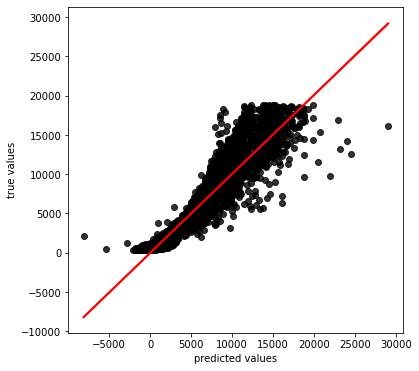

In [139]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [140]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.91

In [141]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

1174.693296514903

In [142]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

4000.04
1174.69
improvement: -2825.35


In [144]:
print(label_data.columns)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_o', 'color_o', 'clarity_o'], dtype='object')


In [145]:
 X = label_data.drop('price', axis = 1)
 y = label_data.price

In [146]:
X.shape

(53907, 9)

In [152]:
y.shape

(53907,)

In [154]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
label_data
training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)

In [155]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeModel = DecisionTreeRegressor(random_state = 0)
DecisionTreeModel.fit(training_features, training_target)  # Training input and its Target variables
DecisionTreePred = DecisionTreeModel.predict(test_features) # I already Know y_test

In [156]:
DecisionTreeModel.fit(training_features, training_target)
### Verification:
results = pd.DataFrame(index= training_features.columns, data={'importance':DecisionTreeModel.feature_importances_})
print('Feature importances:\n{}'.format(results))

Feature importances:
           importance
carat        0.626508
depth        0.003190
table        0.002395
x            0.003784
y            0.263650
z            0.004980
cut_o        0.001600
color_o      0.030650
clarity_o    0.063242


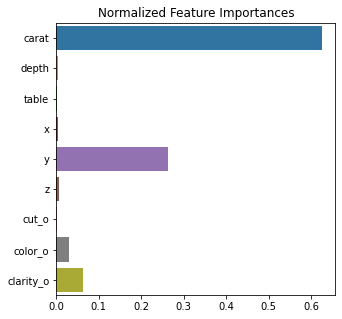

In [197]:
# Plot feature importances
plt.rcParams['figure.figsize'] = 5,5
plt.title('Normalized Feature Importances')
sns.barplot(y =training_features.columns, x = DecisionTreeModel.feature_importances_)
plt.show()

In [159]:
feature_importances = pd.DataFrame({'Importance Coef' :DecisionTreeModel.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(60, 'Importance Coef')

Importance Coef   Features
0         0.626508      carat
4         0.263650          y
8         0.063242  clarity_o
7         0.030650    color_o
5         0.004980          z
3         0.003784          x
1         0.003190      depth
2         0.002395      table
6         0.001600      cut_o

In [254]:
label_data_feature = label_data[[
'carat'
,'y'
,'clarity_o'
,'color_o'
,'cut_o'
,'price']]

In [189]:
X_1.columns 
#-16903.170131143663
[11012.51276826   251.25132341   -30.05485823  -675.64468747
  3286.57203972 -5788.10326035    86.88201502   324.45846532
   498.25071569]


Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_o', 'color_o', 'clarity_o'], dtype='object')

In [255]:
 X_1 = label_data_feature.drop('price', axis = 1)
 y_1 = label_data_feature.price

In [256]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
label_data_feature
training_features, test_features, \
training_target, test_target, = train_test_split(X_1,
                                               y_1,
                                               test_size = .2,
                                               random_state=12)

In [257]:
training_features.columns

Index(['carat', 'y', 'clarity_o', 'color_o', 'cut_o'], dtype='object')

In [258]:
from sklearn.linear_model import LinearRegression # Class
LRegressor = LinearRegression(fit_intercept=True)
LRegressor.fit(training_features, training_target)

LinearRegression()

In [259]:
 X_1.columns

Index(['carat', 'y', 'clarity_o', 'color_o', 'cut_o'], dtype='object')

In [260]:
print(LRegressor.intercept_)
print(LRegressor.coef_)

-4472.179472605569
[10253.30806001  -652.37908973   519.76911374   325.82712402
   111.71974812]


In [261]:
y_train_pred = LRegressor.predict(training_features)
y_train_pred

array([ 204.30369109,   -9.84620413, 1446.55941535, ..., 9061.08737164,
        484.37434863, 5746.69233862])

In [262]:
y_test_pred = LRegressor.predict(test_features)
y_test_pred.flatten()

array([ 3254.80550065,  -485.24975274, 12788.24593615, ...,
        3294.0240826 ,   134.56833504, 12070.32450086])

In [263]:
df_compare = pd.DataFrame({'Actual': test_target, 'Predicted': y_test_pred.flatten()})
df_compare.head()

Actual     Predicted
2316     3167   3254.805501
28178     666   -485.249753
21338    9482  12788.245936
35187     891   1842.890596
30721     738   1203.134393

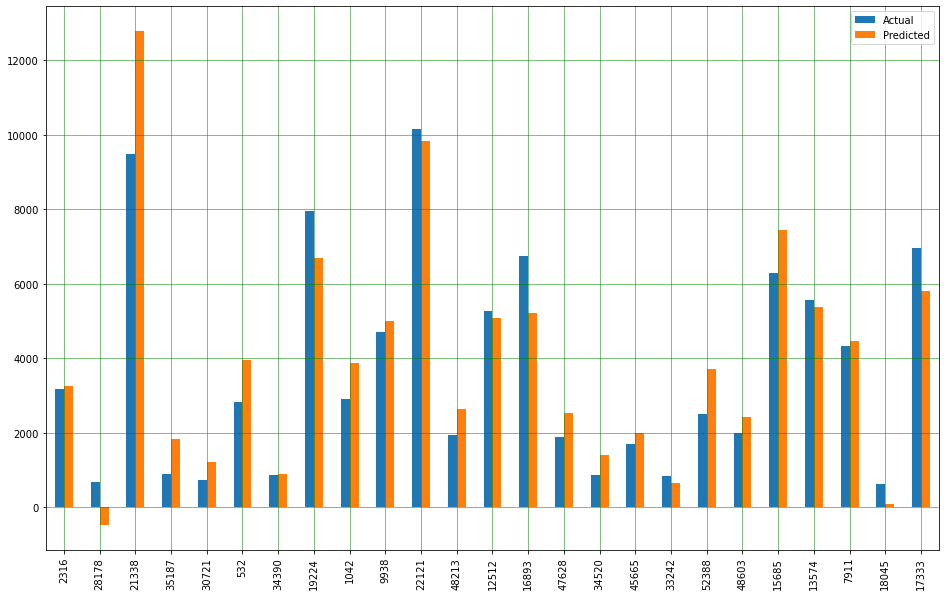

In [264]:
df_compare = df_compare.head(25)
df_compare.plot(kind='bar',figsize=(16,10))
plt.rcParams['figure.figsize'] = 5,5
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

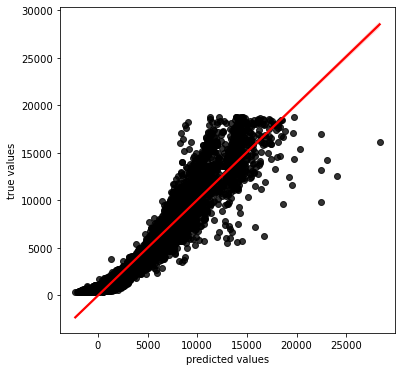

In [265]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_test_pred, 
                 y = test_target, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [266]:
# Predicting the Test set results

y_pred = LRegressor.predict(test_features)

print(LRegressor.intercept_)
print(LRegressor.coef_)

-4472.179472605569
[10253.30806001  -652.37908973   519.76911374   325.82712402
   111.71974812]


In [267]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_target, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_target, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_target, y_test_pred)))

Mean Absolute Error: 816.324975736128
Mean Squared Error: 1462062.252564345
Root Mean Squared Error: 1209.1576624098054


In [268]:
from sklearn.metrics import r2_score
r2_score(training_target, y_train_pred)

0.9040939019661693

## Make new predictions

In [147]:
y.shape

(53907,)

In [143]:
# remember the linear regression equation?
print(equation)

y = -16859.9616 + 10923.6484*carat + 88.8963*cut_o + 324.1036*color_o + 499.6267*clarity_o+ 248.0228*depth+ -29.8836*table 


In [208]:
# make some fake data
fake1= [[0.5, 2, 4,4, 55, 55,5,30,20]] # modest SF home
fake2= [[0.3, 3, 5,5, 55, 65,4,40,25]] # large SF home in big neighborhood
fake3= [[0.4, 4, 6,6, 55, 48,3,50,30]] # small home, not SF, outside big neighborhood

In [209]:
# make predictions just using our equation:
for data in [fake1, fake2, fake3]:
    YearBuilt=data[0][0]
    Bathrooms=data[0][1]
    BedroomAbvGr=data[0][2]
    TotalSF=data[0][3]
    SingleFam=data[0][4]
    LargeNeighborhood=data[0][5]
    y = -1360501.3809 + 704.4287*YearBuilt + 12738.4775*Bathrooms + -7783.1712*BedroomAbvGr + 49.824*TotalSF+ 25282.091*SingleFam+ -6637.2636*LargeNeighborhood 
    print('$',int(y))

$ -340140
$ -401648
$ -283739


In [269]:
# pickle your model
import pickle
filename = open('diamond_price_predict.pkl', 'wb')
pickle.dump(LRegressor, filename)
filename.close()

In [270]:
## read in our pickle file
filename = open('diamond_price_predict.pkl', 'rb')
unpickled_model = pickle.load(filename)
filename.close()

In [273]:
# make predictions
for data in [fake1, fake2, fake3]:
    print('$',int(unpickled_model.predict(data)))

$ 3031
$ 54
$ 18196


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Turn that into a function

In [36]:
def ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood):
    checksum=0
    for var in [YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]:
        if isinstance(var,int)==False:
            checksum+=1
    if (YearBuilt<1900)|(YearBuilt>2020):
        checksum+=1
    if (Bathrooms<1) | (Bathrooms>5):
        checksum+=1
    if (BedroomAbvGr<1) | (BedroomAbvGr>5):
        checksum+=1
    if (TotalSF<100)|(TotalSF>5000):
        checksum+=1
    if (SingleFam!=0) & (SingleFam!=1):
        checksum+=1
    if (LargeNeighborhood!=0) & (LargeNeighborhood!=1):
        checksum+=1
    if checksum>0:
        return "Please provide adequate inputs"
    else:
        y = [-1360501.3809 + 704.4287*YearBuilt + 12738.4775*Bathrooms + -7783.1712*BedroomAbvGr + 49.824*TotalSF+ 25282.091*SingleFam+ -6637.2636*LargeNeighborhood]
#         y = unpickled_model.predict([[YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]])
        formatted_y = "${:,.2f}".format(y[0])
        return formatted_y 

In [37]:
# test the function
YearBuilt=2015
Bathrooms=3
BedroomAbvGr=3
TotalSF=2000
SingleFam=0
LargeNeighborhood=1
ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood)

'$166,799.10'

In [213]:
def diamond_price(clicks, carat,cut,color,clarity,table,depth,x,y,z):
    if clicks==0:
        return "waiting for inputs"
    else:
        y = [-16903.17 + 11012.51*carat + 251.25*cut + -30.05*color + -675.64*clarity+ 3286.57*table+ -5788.10*depth+ 86.88*x+ 324.46*y+ 498.25*z]
        formatted_y = "${:,.2f}".format(y[0])
        return formatted_y

In [ ]:
# make some fake data
fake1= [[0.5, 2, 4,4, 55, 55,5,30,20]] # modest SF home
fake2= [[0.3, 3, 5,5, 55, 65,4,40,25]] # large SF home in big neighborhood
fake3= [[0.4, 4, 6,6, 55, 48,3,50,30]] # small home, not SF, outside big neighborhood

In [248]:
test_features.head()

carat     y  clarity_o  color_o
2316    0.72  5.81          5        3
28178   0.41  4.78          2        4
21338   2.04  8.04          2        1
35187   0.31  4.42          8        4
30721   0.41  4.77          4        7

In [280]:
test_features.y.unique()

array([5.81, 4.78, 8.04, 4.42, 4.77, 5.74, 6.42, 5.43, 6.18, 7.32, 5.39,
       6.26, 6.39, 5.1 , 4.43, 5.12, 4.84, 5.36, 5.49, 7.02, 6.49, 4.25,
       6.62, 4.57, 7.72, 5.78, 4.31, 4.53, 5.04, 7.99, 6.13, 5.57, 6.59,
       4.39, 5.77, 5.72, 5.6 , 6.4 , 4.82, 6.73, 5.37, 6.14, 6.33, 6.57,
       7.92, 5.48, 4.8 , 7.98, 5.71, 5.33, 5.02, 6.09, 6.08, 6.38, 6.12,
       4.33, 5.75, 4.94, 6.51, 6.21, 5.86, 4.41, 5.79, 6.56, 4.34, 4.32,
       4.83, 4.69, 3.96, 4.29, 4.49, 5.85, 7.73, 4.46, 5.83, 4.71, 8.18,
       7.47, 5.97, 7.3 , 4.26, 4.81, 5.68, 5.88, 5.29, 5.35, 4.5 , 4.35,
       6.72, 4.63, 4.87, 6.76, 5.45, 6.35, 6.28, 6.17, 7.34, 6.74, 6.5 ,
       8.56, 5.84, 6.44, 4.51, 7.2 , 4.47, 5.96, 6.34, 4.44, 5.24, 4.24,
       7.93, 8.21, 6.2 , 7.51, 4.01, 6.24, 4.37, 6.6 , 4.55, 7.38, 6.53,
       4.79, 6.52, 6.84, 5.11, 4.22, 4.54, 6.04, 6.68, 4.7 , 4.52, 6.45,
       4.65, 5.9 , 6.36, 8.25, 4.36, 6.46, 5.8 , 5.13, 4.59, 6.31, 8.06,
       7.42, 7.9 , 6.63, 5.69, 7.58, 5.63, 4.2 , 5.

In [283]:
# make some fake data
fake1= [[0.72, 5.81, 5,3,3]] # modest SF home
fake2= [[5.51, 8.78, 2,6,4]] # large SF home in big neighborhood
fake3= [[2.04, 10.04, 8,7,5]] # small home, not SF, outside big neighborhood

In [284]:
# make predictions
for data in [fake1, fake2, fake3]:
    print('$',int(unpickled_model.predict(data)))

$ 3031
$ 49737
$ 16892


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [272]:
diamond_price(1, 0.5,2,4,4,55,55,5,30,20)

'$-131,168.12'

In [ ]:
Index(['carat', 'y', 'clarity_o', 'color_o']